<a href="https://colab.research.google.com/github/Akr164/Dogs_Cats_kaggle/blob/main/CatdogPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [97]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [98]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [99]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout

In [100]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [101]:
# normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [102]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size = (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size = (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

In [103]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [104]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [105]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 108ms/step - loss: 1.3663 - accuracy: 0.6101 - val_loss: 0.5758 - val_accuracy: 0.6976
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5644 - accuracy: 0.7084 - val_loss: 0.5472 - val_accuracy: 0.7252
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4746 - accuracy: 0.7715 - val_loss: 0.4852 - val_accuracy: 0.7690
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4107 - accuracy: 0.8167 - val_loss: 0.5669 - val_accuracy: 0.6608
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3664 - accuracy: 0.8380 - val_loss: 0.9467 - val_accuracy: 0.6282
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2973 - accuracy: 0.8740 - val_loss: 0.5439 - val_accuracy: 0.7844
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2163 - accuracy: 0.9111 - val_loss: 0.5221 - val_ac

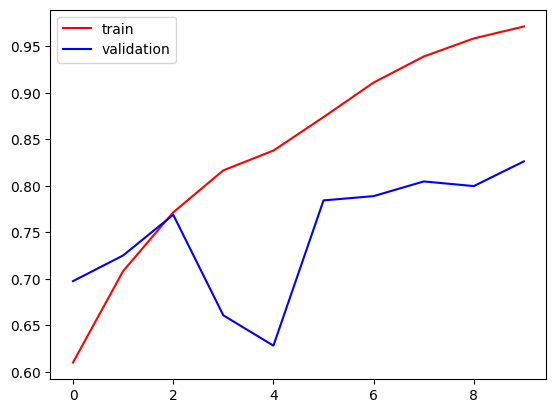

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue',label='validation')
plt.legend()
plt.show()

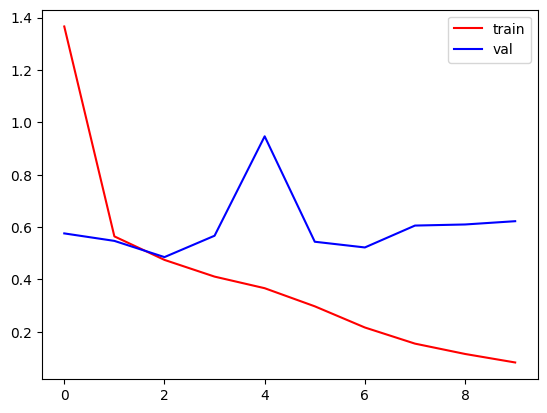

In [107]:
plt.plot(history.history['loss'], color = 'red',label='train')
plt.plot(history.history['val_loss'], color = 'blue',label='validation')
plt.legend(['train', 'val'])
plt.show()

In [108]:
import cv2

In [109]:
import numpy as np

# Load the images
img1 = cv2.imread('/content/images.jpg')
img2 = cv2.imread('/content/cat.jpg')
img3 = cv2.imread('/content/d.jpg')

img1 = cv2.resize(img1, (256, 256))
img2 = cv2.resize(img2, (256, 256))
img3 = cv2.resize(img2, (256, 256))

# Ensure the images have the same shape


# Store them in a NumPy array
images = np.array([img1, img2,img3])

In [110]:
test_input = images.reshape((3, 256, 256, 3))

In [111]:
model.predict(test_input)

1/1 [==============================] - 0s 114ms/step


array([[0.],
       [0.],
       [0.]], dtype=float32)